In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Try reading the file with a different encoding
try:
    df = pd.read_csv("spam.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv("spam.csv", encoding='latin1')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv("spam.csv", encoding='iso-8859-1')
        except UnicodeDecodeError:
            print("Unable to read the file with utf-8, latin1, or iso-8859-1 encoding")


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3300,spam,RCT' THNQ Adrian for U text. Rgds Vatian,NaN,NaN,NaN
2995,ham,They released vday shirts and when u put it on...,NaN,NaN,NaN
3371,ham,And now electricity just went out fml.,NaN,NaN,NaN
5263,ham,Pls speak with me. I wont ask anything other t...,NaN,NaN,NaN
5406,ham,Dear are you angry i was busy dear,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3',"Unnamed: 4"],inplace=True)

In [7]:
df.sample(5)

,v1,v2
780,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
5208,ham,Hi.what you think about match?
3782,ham,Can you do online transaction?
3703,ham,Kent vale lor... ÌÏ wait 4 me there ar?
3965,ham,I was just callin to say hi. Take care bruv!


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2237,ham,"Give her something to drink, if she takes it a..."
2348,ham,That seems unnecessarily affectionate
1712,ham,o turns out i had stereo love on mi phone unde...
2544,ham,She is our sister.. She belongs 2 our family.....
2876,ham,twenty past five he said will this train have ...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

### EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

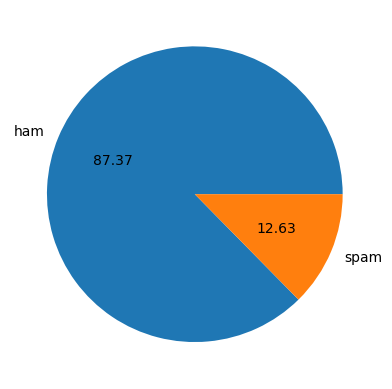

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
# Data is imbalanced

In [21]:
import nltk

In [22]:
!pip install nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# numbers of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#ham
df[df['target'] ==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

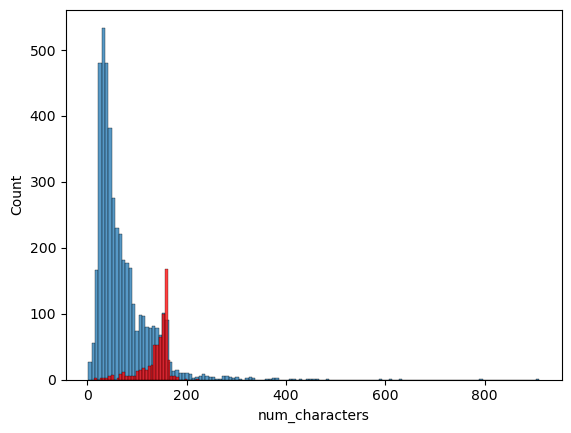

In [34]:
plt.figure(figure=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

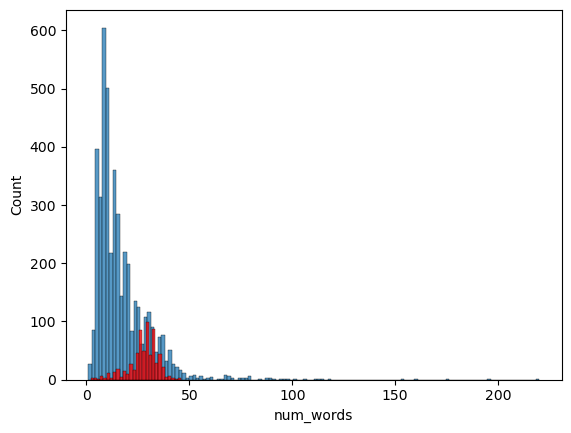

In [35]:
plt.figure(figure=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

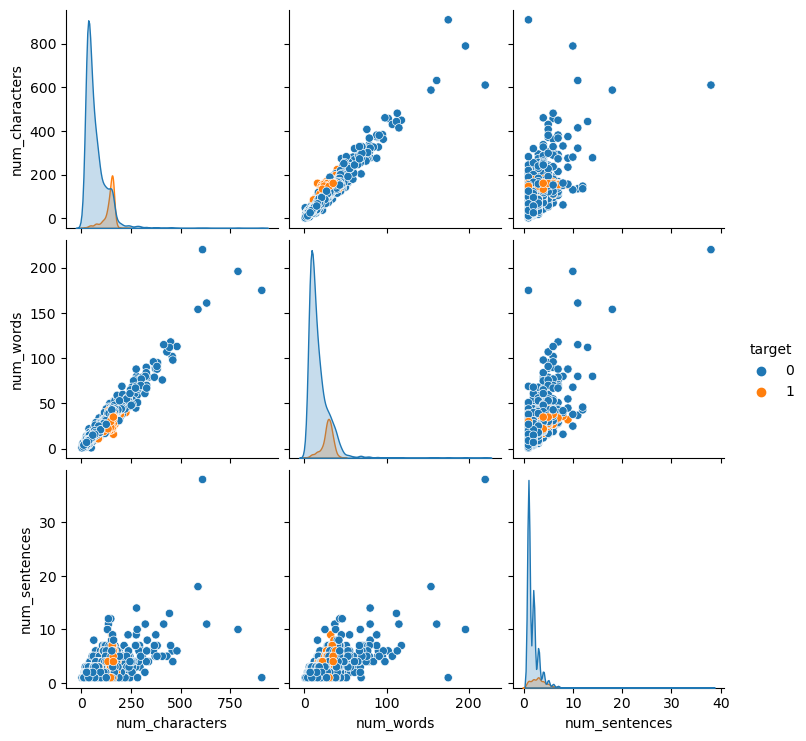

In [36]:
sns.pairplot(df,hue='target')

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)
    
    # Initialize the PorterStemmer
    ps = PorterStemmer()
    
    # Initialize a list to store the transformed words
    y = []
    
    # Filter out non-alphanumeric tokens and apply stemming
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    
    # Join the stemmed words back into a single string
    return " ".join(y)

# Example usage
text = "Did you like my presentation on ML?"
transformed_text = transform_text(text)
print(transformed_text)


like present ml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

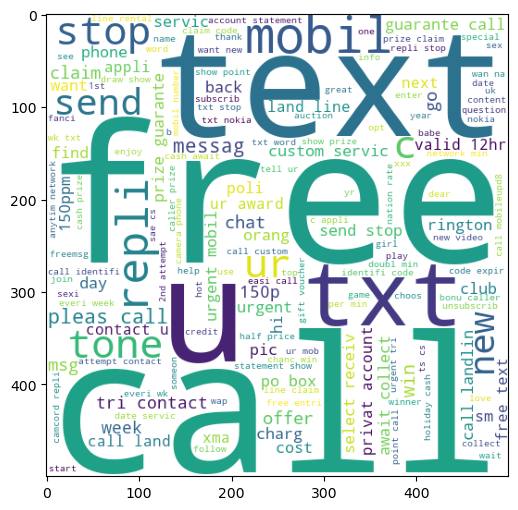

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

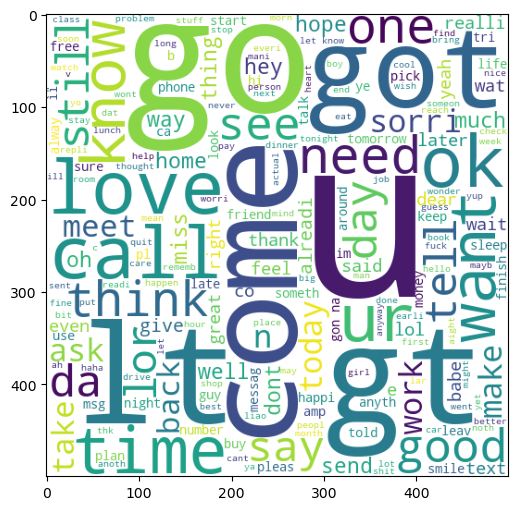

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [50]:
len(spam_corpus)

9939

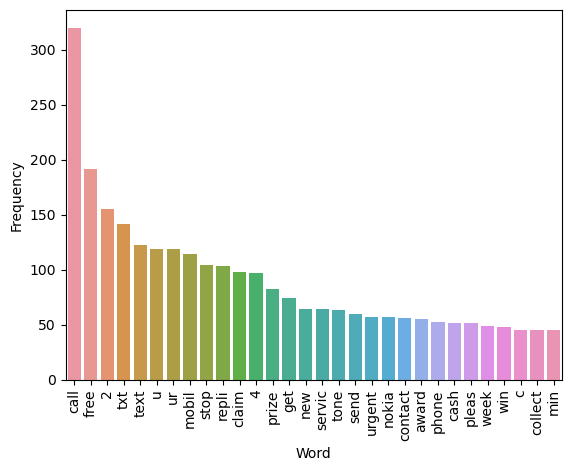

In [51]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list of words or tokens
# You might need to replace it with the actual data
# For example: spam_corpus = ["word1", "word2", ...]

# Calculate word frequencies using Counter
word_counts = Counter(spam_corpus)

# Create a DataFrame from the most common words and their counts
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using seaborn
sns.barplot(x='Word', y='Frequency', data=word_counts_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35404

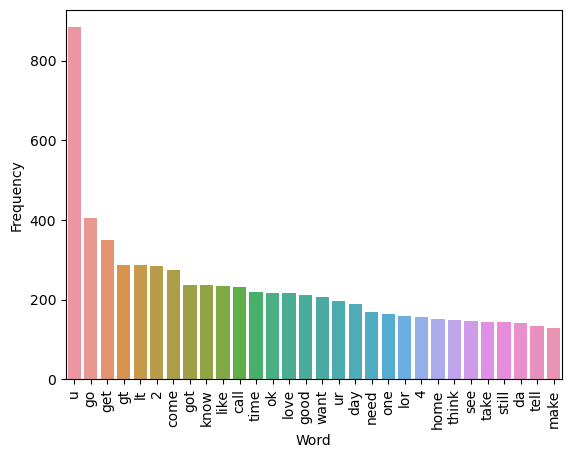

In [54]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list of words or tokens
# You might need to replace it with the actual data
# For example: ham_corpus = ["word1", "word2", ...]

# Calculate word frequencies using Counter
word_counts = Counter(ham_corpus)

# Create a DataFrame from the most common words and their counts
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using seaborn
sns.barplot(x='Word', y='Frequency', data=word_counts_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [55]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Model building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [57]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [58]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [59]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [60]:
X.shape

(5169, 3000)

In [61]:
y = df['target'].values

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [67]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [68]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [69]:
# tfidf --> MNB

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [72]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [74]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [81]:
# Assume that clfs is a dictionary containing classifiers and their names
clfs = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

accuracy_scores = []
precision_scores = []

# Loop through classifiers
for name, clf in clfs.items():
    # Train the classifier and obtain accuracy and precision scores
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    # Print the results
    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    
    # Append the scores to the lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# Simulated output
print("\nOverall Results:")
for name, accuracy, precision in zip(clfs.keys(), accuracy_scores, precision_scores):
    print(f"{name}: Accuracy={accuracy}, Precision={precision}")


For Decision Tree
Accuracy: 0.9439071566731141
Precision: 0.803030303030303
For Random Forest
Accuracy: 0.9777562862669246
Precision: 0.9752066115702479
For Logistic Regression
Accuracy: 0.9564796905222437
Precision: 0.979381443298969

Overall Results:
Decision Tree: Accuracy=0.9439071566731141, Precision=0.803030303030303
Random Forest: Accuracy=0.9777562862669246, Precision=0.9752066115702479
Logistic Regression: Accuracy=0.9564796905222437, Precision=0.979381443298969


In [82]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)


In [83]:
performance_df

,Algorithm,Accuracy,Precision
2,Logistic Regression,0.956480,0.979381
1,Random Forest,0.977756,0.975207
0,Decision Tree,0.943907,0.803030


In [84]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [85]:
performance_df1

,Algorithm,variable,value
0,Logistic Regression,Accuracy,0.956480
1,Random Forest,Accuracy,0.977756
2,Decision Tree,Accuracy,0.943907
3,Logistic Regression,Precision,0.979381
4,Random Forest,Precision,0.975207
5,Decision Tree,Precision,0.803030


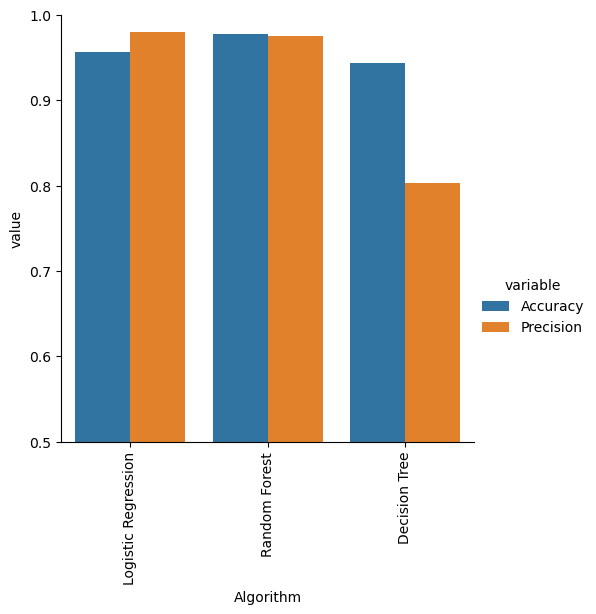

In [86]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [87]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [89]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [90]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [92]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,Logistic Regression,0.956480,0.979381,0.956480,0.979381,0.956480,0.979381,0.956480,0.979381
1,Random Forest,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
2,Decision Tree,0.943907,0.803030,0.943907,0.803030,0.943907,0.803030,0.943907,0.803030


In [93]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [94]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [95]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [96]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [97]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [100]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539
